In [1]:
# addprocs(7)  # parallel computing

In [2]:
include("prepare_data_Sioux_simp.jl");
include("extract_data.jl");
include("tap_MSA_Sioux_simp.jl");
include("inverseVI.jl");
include("demands_adjustment_Sioux_simp_gradi.jl");

In [3]:
tapFlowVecDict = Dict{Int64, Array{Float64, 1}}();
tapFlowDicDict = Dict{Int64, Dict{(Int64,Int64),Float64}}();
arcsDict = Dict{Int64, Dict{(Int, Int), Arc}}();
coeffs_dict = Dict{(Int64,Float64,Float64,Int64),Array{Float64,1}}();
jacobDict = Dict{Int64, Array{Float64}}();
descDirecDict = Dict{Int64, Array{Float64,1}}();
searchDirecDict = Dict{Int64, Array{Float64,1}}();
demandsVecDict = Dict{Int64, Array{Float64,1}}();
thetaMaxDict = Dict{Int64, Float64}();
objFunDict = Dict{Int64, Float64}();
objInvVIDict = Dict{Int64, Float64}();

In [4]:
fcoeffs = [1, 0, 0, 0, .15];
# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA(demandsDict[0], fcoeffs);

In [5]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[0])

Dict{(Int64,Int64),Arc} with 30 entries:
  (11,12) => Arc(11,12,4908.82673,6.0,4239.4)
  (4,3)   => Arc(4,3,17110.52372,4.0,7059.63333333333)
  (2,6)   => Arc(2,6,4958.180928,5.0,3500.966666666673)
  (11,4)  => Arc(11,4,4908.82673,6.0,4202.566666666679)
  (5,6)   => Arc(5,6,4947.995469,4.0,8041.733333333338)
  (4,11)  => Arc(4,11,4908.82673,6.0,4155.466666666669)
  (8,6)   => Arc(8,6,4898.587646,2.0,7550.400000000001)
  (5,4)   => Arc(5,4,17782.7941,2.0,10650.166666666677)
  (10,11) => Arc(10,11,10000.0,5.0,8249.400000000003)
  (2,1)   => Arc(2,1,25900.20064,6.0,2300.433333333334)
  (8,9)   => Arc(8,9,5050.193156,10.0,5149.599999999999)
  (12,3)  => Arc(12,3,23403.47319,4.0,3039.7999999999984)
  (11,10) => Arc(11,10,10000.0,5.0,8157.633333333335)
  (3,1)   => Arc(3,1,23403.47319,4.0,3900.433333333334)
  (5,9)   => Arc(5,9,10000.0,5.0,7900.199999999996)
  (6,2)   => Arc(6,2,4958.180928,5.0,3500.966666666673)
  (6,8)   => Arc(6,8,4898.587646,2.0,7542.166666666662)
  (4,5)   => Arc(4,5,17

In [6]:
deg = 6
c = 3.41
lam = 1.

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDict[1], arcsDict[0])

([1.0,0.00930161,0.0346947,-0.139536,0.0898315,0.0527054,0.00656301],0.00673015770593588)

In [7]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], coeffs_dict[(deg, c, lam, 1)]);

demandsVecDict[0] = demandsDicToVec(demandsDict[0]);

In [8]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[1])

Dict{(Int64,Int64),Arc} with 30 entries:
  (11,12) => Arc(11,12,4908.82673,6.0,4305.118186240872)
  (4,3)   => Arc(4,3,17110.52372,4.0,6917.19602631292)
  (2,6)   => Arc(2,6,4958.180928,5.0,3596.54477865566)
  (11,4)  => Arc(11,4,4908.82673,6.0,4271.219888628394)
  (5,6)   => Arc(5,6,4947.995469,4.0,8011.504183804991)
  (4,11)  => Arc(4,11,4908.82673,6.0,4324.0380688560645)
  (8,6)   => Arc(8,6,4898.587646,2.0,7355.448866678319)
  (5,4)   => Arc(5,4,17782.7941,2.0,10760.838005899946)
  (10,11) => Arc(10,11,10000.0,5.0,7939.8554777055315)
  (2,1)   => Arc(2,1,25900.20064,6.0,2221.2908255308525)
  (8,9)   => Arc(8,9,5050.193156,10.0,4876.190141528025)
  (12,3)  => Arc(12,3,23403.47319,4.0,3061.982121628475)
  (11,10) => Arc(11,10,10000.0,5.0,8161.297239583508)
  (3,1)   => Arc(3,1,23403.47319,4.0,3704.228332876725)
  (5,9)   => Arc(5,9,10000.0,5.0,8168.931841887311)
  (6,2)   => Arc(6,2,4958.180928,5.0,3377.370233529537)
  (6,8)   => Arc(6,8,4898.587646,2.0,7452.061378738435)
  (4,5)   =

In [9]:
for iterNumber = 1:9
    
    l = iterNumber
    
    jacobDict[l] = jacobian(tapFlowVecDict[l], coeffs_dict[(deg, c, lam, l)], capacity, 
    free_flow_time, numLinks, numODpairs, numRoutes, linkRoute, odPairRoute);

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);

    demandsVecDict[l] = demandsDicToVec(demandsDict[l]);

    searchDirecDict[l] = searchDirec(demandsVecDict[l], descDirecDict[l], 0);

    thetaMaxDict[l] = thetaMax(demandsVecDict[l], searchDirecDict[l]);

    objFunDict[l] = objF(demandsVecDict[l]);

    demandsVecDict[l+1] = similar(demandsVecDict[0]);
    
    demandsVecDict[l+1], objFunDict[l+1] = armijo(demandsVecDict[l], searchDirecDict[l], thetaMaxDict[l], 2, 5);
            
    demandsDict[l+1] = demandsVecToDic(demandsVecDict[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA(demandsDict[l+1], coeffs_dict[(deg, c, lam, l)]);
    
    arcsDict[l+1] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[l+1]);
    
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDict[l+1], arcsDict[l+1]);
    
end

In [10]:
demandsVecDict

Dict{Int64,Array{Float64,1}} with 11 entries:
  2  => [111.82028181304617,105.62965328656219,550.984177365724,208.590461535516…
  0  => [100.0,100.0,500.0,200.0,300.0,500.0,800.0,500.0,1300.0,500.0,200.0,100.…
  7  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  9  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  10 => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  8  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  6  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  4  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  3  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  5  => [124.63376516328645,92.59692970906521,599.5448484249968,216.734001826727…
  1  => [91.18969998569627,96.52082610863866,510.45468876648914,207.470241767699…

In [11]:
objFunDict

Dict{Int64,Float64} with 10 entries:
  7  => 724030.4167155351
  4  => 724030.4167155351
  9  => 724030.4167155351
  10 => 724030.4167155351
  2  => 757965.1860398835
  3  => 724030.4167155351
  5  => 724030.4167155351
  8  => 724030.4167155351
  6  => 724030.4167155351
  1  => 848099.8359062525

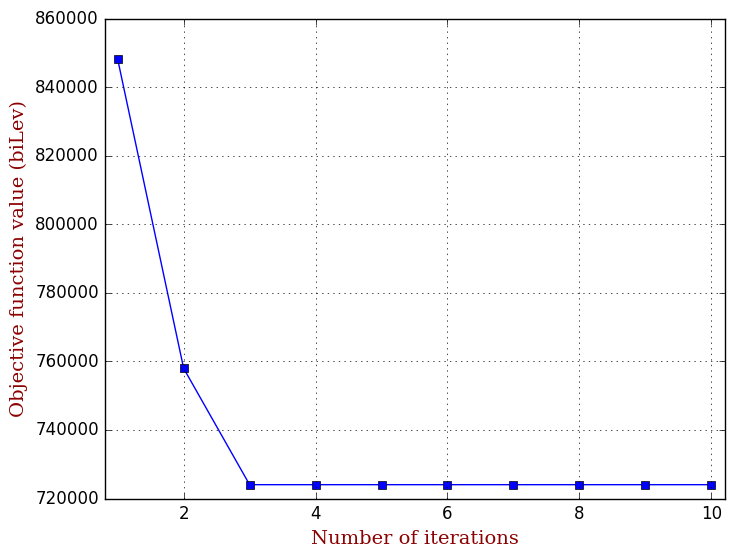

In [43]:
using PyPlot

iterNum = 1:10

objFun = map(iterNum->objFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, 10.2)
# ylim(0.9, 2.0)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (biLev)", fontdict=font1)

savefig("objFun_biLev_Sioux_simp.pdf")

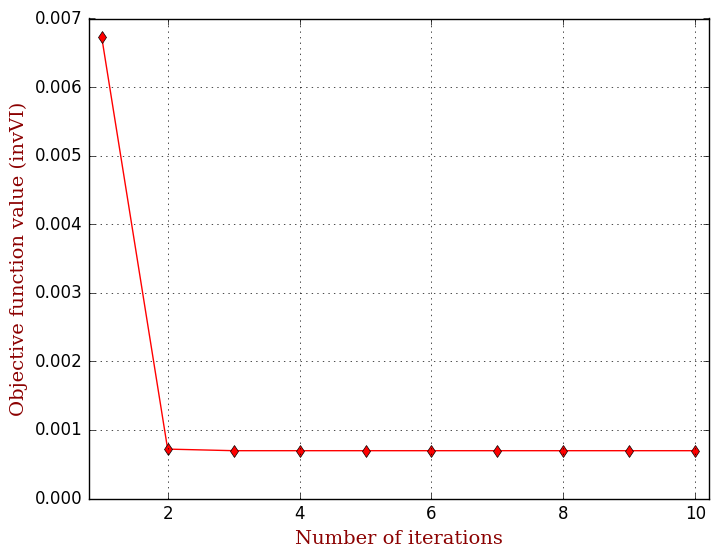

In [44]:
using PyPlot

iterNum = 1:10

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "d-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, 10.2)
# ylim(0.9, 2.0)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("objFun_invVI_Sioux_simp.pdf")

In [14]:
coeffs_dict

Dict{(Int64,Float64,Float64,Int64),Array{Float64,1}} with 10 entries:
  (6,3.41,1.0,2)  => [1.0,0.007894587324396874,-0.051630241880883915,0.097713967…
  (6,3.41,1.0,6)  => [1.0,0.007715620884989627,-0.050992520230125134,0.097627210…
  (6,3.41,1.0,7)  => [1.0,0.007715620884989627,-0.050992520230125134,0.097627210…
  (6,3.41,1.0,5)  => [1.0,0.0077153876627119086,-0.05099111480146507,0.097624382…
  (6,3.41,1.0,3)  => [1.0,0.007716637458328564,-0.0509979016049896,0.09763594849…
  (6,3.41,1.0,9)  => [1.0,0.007715620884989627,-0.050992520230125134,0.097627210…
  (6,3.41,1.0,10) => [1.0,0.007715620884989627,-0.050992520230125134,0.097627210…
  (6,3.41,1.0,8)  => [1.0,0.007715620884989627,-0.050992520230125134,0.097627210…
  (6,3.41,1.0,4)  => [1.0,0.0077290409734585876,-0.05106557596015673,0.097752571…
  (6,3.41,1.0,1)  => [1.0,0.009301607663990956,0.0346947480937545,-0.13953605251…

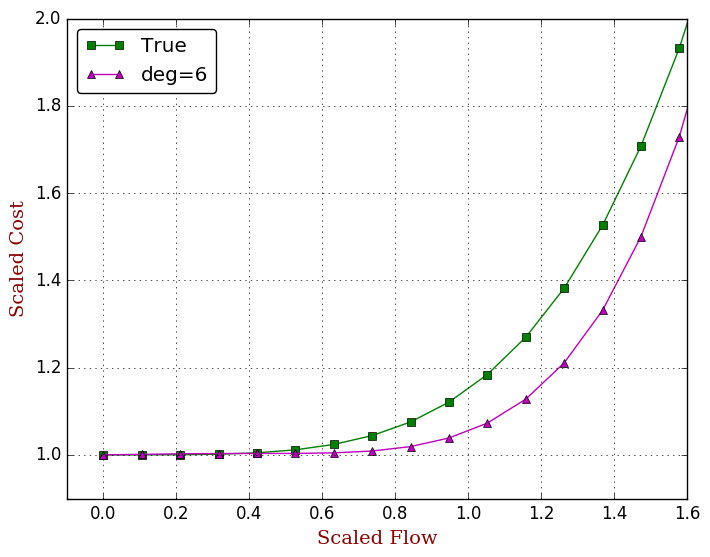

In [48]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(6, 3.41, 1., iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "s-g", label="True")

plot(xs, zs, "^-m", label="deg=6")
legend(loc="upper left",fancybox="true") 

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("fitting_Sioux_simp_iter_$(iterN).pdf")